In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### The dataset I studied was the "IBM HR Analytics Employee Attrition & Performance" dataset.  It contains information for over 1400 employees; information such as hourly rate, eductaion levels, job and environment satisfaction, gender, distance from home, business travel, years at company, and years with current manager, among many other data points.  It also tells us whether or not that job or job position was lost due to attrition.  


In [67]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df = df.dropna()
df = df.drop_duplicates()

print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0      

In [68]:
#filering the dataframe by attrition 
att_yes = df[df['Attrition'] == 'Yes']
att_no = df[df['Attrition'] == 'No']


#### After filtering the dataframe based on attrition, I took the average of the key variables in both of the data sets.

In [69]:
print("Average age of the group with attrition is: " + str(np.mean(att_yes['Age'])) + "and std is: " + str(np.std(att_yes['Age'], ddof=1)))
print("Average age of the group without attrition is: " + str(np.mean(att_no['Age'])) + "and std is: " + str(np.std(att_no['Age'], ddof=1)))
print("Not a significant difference in the ages of the two groups.")
print()

print("Average education level of the group with attrition is: " + str(np.mean(att_yes['Education'])) + "and std is: " + str(np.std(att_yes['Education'], ddof=1)))
print("Average education level of the group without attrition is: " + str(np.mean(att_no['Education'])) + "and std is: " + str(np.std(att_no['Education'], ddof=1)))
print("Not a significant difference in the education levels of the two groups.")
print()

print("Average environment satisfaction of the group with attrition is: " + str(np.mean(att_yes['EnvironmentSatisfaction'])) + "and std is: " + str(np.std(att_yes['EnvironmentSatisfaction'], ddof=1)))
print("Average environment satisfaction of the group with attrition is: " + str(np.mean(att_no['EnvironmentSatisfaction'])) + "and std is: " + str(np.std(att_no['EnvironmentSatisfaction'], ddof=1)))
print("Not a significant difference in environment satisfaction ratings between the two groups.")
print()

print("Average hourly rate of the group with attrition is: " + str(np.mean(att_yes['HourlyRate'])) + "and std is: " + str(np.std(att_yes['HourlyRate'], ddof=1)))
print("Average hourly rate of the group with attrition is: " + str(np.mean(att_no['HourlyRate'])) + "and std is: " + str(np.std(att_no['HourlyRate'], ddof=1)))
print("Not a significant difference in the hourly rate between the two groups.")
print()

print("Average level of work/life balance of the group with attrition is: " + str(np.mean(att_yes['WorkLifeBalance'])) + "and std is: " + str(np.std(att_yes['WorkLifeBalance'], ddof=1)))
print("Average level of work/life balance of the group with attrition is: " + str(np.mean(att_no['WorkLifeBalance'])) + "and std is: " + str(np.std(att_no['WorkLifeBalance'], ddof=1)))
print("Not a significant difference in the work/life balance rating between the two groups.")
print()


Average age of the group with attrition is: 33.607594936708864and std is: 9.689349895351622
Average age of the group without attrition is: 37.561232765612324and std is: 8.888360024976546
Not a significant difference in the ages of the two groups.

Average education level of the group with attrition is: 2.839662447257384and std is: 1.0082439277172608
Average education level of the group without attrition is: 2.927007299270073and std is: 1.027001789717541
Not a significant difference in the education levels of the two groups.

Average environment satisfaction of the group with attrition is: 2.4641350210970465and std is: 1.1697912816861842
Average environment satisfaction of the group with attrition is: 2.7712895377128954and std is: 1.071132293854282
Not a significant difference in environment satisfaction ratings between the two groups.

Average hourly rate of the group with attrition is: 65.57383966244726and std is: 20.099957606615547
Average hourly rate of the group with attrition is: 

#### I found that there is no significant difference in the hourly rate, education level, environment satisfaction, and work/life balance between the job positions that were lost to attrition, and the positions that were not lost due to attrition.  

#### Attrition didn't affect any one particular department within the company, as you can see below.

In [70]:
print(att_yes['Department'].value_counts())

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64


#### Also, travel was also not a factor in job loss due to attrition.  As you can see below, most of the positions lost rarely involved traveling.

In [71]:
print(att_yes['BusinessTravel'].value_counts())

Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: BusinessTravel, dtype: int64


#### Attrition was not specfic to any gender either.

In [72]:
print(att_yes['Gender'].value_counts())

Male      150
Female     87
Name: Gender, dtype: int64


#### Attrition didn't always affect the lowest ranks of a company's workforce.  For example in our dataset, we saw that attrition affected a broad range of positions from the less technical Sales Representatives to the Science and Tech heavy Research Scientists.  After filtering our dataset by attrition value, we see that 47 of the 237 positions lost to attrition were of Research Scientists and 33 of the 237 positions lost were of sales representatives.  

In [73]:
print(att_yes['JobRole'].value_counts())
print()
print("The total number of job positions lost to attrition was: " + str(att_yes['JobRole'].count()))

Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: JobRole, dtype: int64

The total number of job positions lost to attrition was: 237


#### However I did see a significant difference in the data within our two filtered datasets in the three important variables: "years in current role", "years at company", and the "years with current manager".

In [74]:
print("Average \"years in current role\" of the group with attrition is: " + str(np.mean(att_yes['YearsInCurrentRole'])) + "and std is: " + str(np.std(att_yes['YearsInCurrentRole'], ddof=1)))
print("Average \"years in current role\" of the group without attrition is: " + str(np.mean(att_no['YearsInCurrentRole'])) + "and std is: " + str(np.std(att_no['YearsInCurrentRole'], ddof=1)))
print()

print("Average \"years at company\" of the group with attrition is: " + str(np.mean(att_yes['YearsAtCompany'])) + "and std is: " + str(np.std(att_yes['YearsAtCompany'], ddof=1)))
print("Average \"years at company\" of the group with attrition is: " + str(np.mean(att_no['YearsAtCompany'])) + "and std is: " + str(np.std(att_no['YearsAtCompany'], ddof=1)))
print()
print("Average \"years with current manager\" of the group with attrition is: " + str(np.mean(att_yes['YearsWithCurrManager'])) + "and std is: " + str(np.std(att_yes['YearsWithCurrManager'], ddof=1)))
print("Average \"years with current manager\" of the group without attrition is: " + str(np.mean(att_no['YearsWithCurrManager'])) + "and std is: " + str(np.std(att_no['YearsWithCurrManager'], ddof=1)))


Average "years in current role" of the group with attrition is: 2.9029535864978904and std is: 3.174826788608656
Average "years in current role" of the group without attrition is: 4.484184914841849and std is: 3.649401926387973

Average "years at company" of the group with attrition is: 5.1308016877637135and std is: 5.949984029204934
Average "years at company" of the group with attrition is: 7.369018653690187and std is: 6.096298144398664

Average "years with current manager" of the group with attrition is: 2.852320675105485and std is: 3.1433486567811237
Average "years with current manager" of the group without attrition is: 4.367396593673966and std is: 3.5941160138926396


#### The key take away from this is that the job positions that were not lost due to attrition were held by employees who stayed within their current role, and under the same manager, by an average of almost a year and half longer, than those postions that were lost to attrition.

#### The boxplot below gives a better visual sense of this difference in a very meaningful way. It clearly shows that the job positions that were not lost to attrition tended to be have a lengthier working relationship with their particular manager.  

#### Also, the boxplot shows that within those positions that were lost to attrition, married individuals tended to have a lengthier working relationship with a manager.  I would assume that married individuals would put more value on building a stable long-term relationship, whether in their personal or professional life.


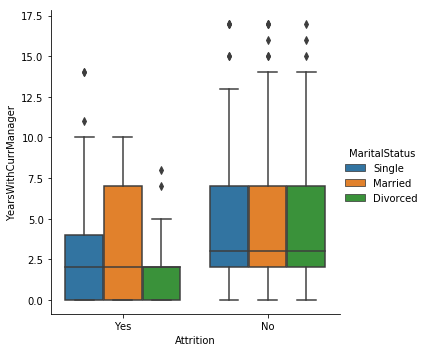

In [75]:
sns.catplot(x="Attrition", y="YearsWithCurrManager", hue="MaritalStatus", kind="box", data=df)
plt.show()


## The Problem

#### This dataset led me to question, is attrition more prevalent among job positions that lacked a long-term working relationship with management?

#### The significant differences that are found in these three variables suggest that attrition maybe linked to how management valued a certain job position.  This could affect the quality of communication between management and employee, along with their performance level and overall morale.

#### By definition, attrition can lead to a reduction in the workforce due to an employee retiring or quitting.  If it is ignored, it can negatively affect the competitivness of a company because of the potential loss of experience in a company's ranks, and the need to implement costly training programs to make up for the people that left.

## Hypothesis:

#### A positive professional relationship between manager and employee will reduce attrition in a company.¶

## The Process:

#### Pick a company and divide its employees into two equal groups that will act as our two sample groups.  Each group should have atleast 1000 people, giving us an adequate sample size to generate normal data.  The persons in the two groups will be of similar age mix, gender mix, pay level, and education level.  The persons will also have the same marital status, which for the sake of our experiment should be single.  We will run the experiment for a period of three years, because from our dataset we can see that the average number of years a person stayed in a particular job role, before his/her position was lost to attrition was about three years.  But we will monitor attrition on a yearly basis within the three year time frame, and consider only those positions vacated by the employee's own choice.

#### In the first group (test group), we will task the managers to implement a web-based performance management software, such as Performance Culture, and have monthly review/development sessions with each employee.  For the initial three months, we will monitor the managers to make sure they are implementing Performance Culture software properly within their departments.  All employee computers in this group will have Performance Culture installed on them, so that employees and managers can use the developmental tools to monitor and develop each other's perfomance, and at the same time create a better professional relationship with each other. 

#### The second group (the control group) will not have Performance Culture implemented and instead will only have two annual reviews, one every six months.

## Variable of interest:

#### The variable of interest is the number of job positions lost due to attrition from each group after three years.  We will run a t-test calculation on the data of all the jobs vacated during the  three years from both groups, and use a p-value of .05 as our significance level, to measure how significant the difference in our two groups are.  If the p value is greater than .05, than we will reject our hypothesis that implementing a performance management software within an organization will help reduce attrition, and we will accept the null hypothesis that a positive professional relationship between manager and employee does not effect attrition in a company.

## Secondary Metric:
#### A secondary metric we can track, that will also give us insights, is the time it took to fill, or replace, the vacated job positions.

